# O(2) - Model , J Engels et al PhyLettB 2000

In [2]:
# import ising_lib
# from imp import reload 
# reload(ising_lib)
from ising_lib import *
from numpy import *
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import *

def variance(X):
    return var(X)
def Average(X):
    return average(X)
def analyze(temparature,L,E,M):
    en,en_err=jacknife(E,Average)
    mag,mag_err=jacknife(M,Average)
    sp_heat,sp_heat_err=jacknife(E,variance)
    sp_heat/=(temparature*temparature*L)
    sp_heat_err/=(temparature*temparature*L)
    sucep,sucep_err=jacknife(M,variance)
    sucep/=(temparature*L)
    sucep_err/=(temparature*L)
    return [mag,mag_err],[sp_heat,sp_heat_err],[sucep,sucep_err],[en,en_err]

def leniar_fn(x,a,b):
    return a*x+b

def quadratic_fn(x,a,b,c):
    return a*x*x+b*x+c

def read_analyzed_data(fname):
        f=open(fname,'r')
        analysis_vals=dict()
        l=f.readline()
        item_list=l[1:-1].split(',')
        the_dict={it:[] for it in item_list}
        l=f.readline()
        i=0
        while l:
            if l[0]=='#':
                l=f.readline()
                continue
            i+=1
            try:
                it=l[:-1].split(',')
        #         print(it)
                L=float(it[1])
                J=float(it[4])
                H0=float(it[5])
                if L not in analysis_vals.keys():
                    analysis_vals.update({L:dict()})
                if J not in analysis_vals[L].keys():
                    analysis_vals[L].update({J:dict()})
                if H0 not in analysis_vals[L][J].keys():
                    analysis_vals[L][J].update({H0:dict(the_dict)})
                for val,end_key in zip(it,item_list):
                    analysis_vals[L][J][H0][end_key]=float(val)
                l=f.readline()
            except:
                print(it)
                l=f.readline()
        f.close()
        print(i ," DATA LINES READ")
        return analysis_vals
    
def read_generic_data(fname):
    f=open(fname,'r')
    X=True
    while(X):
        X=False
        l=f.readline()
        item=l[:-1].split(",")
        extracted_vals={it:[] for it in item}
        l=f.readline()
        i=0
        while l:
            i+=1
            if '#' in l[0:5]:
                l=f.readline()
                continue
            try:
                it=l[:-1].split(',')
                for item,key in zip(it,list(extracted_vals.keys())):
                        try:
                            extracted_vals[key].append(float(item))
                        except:
                            extracted_vals[key].append(item)
                l=f.readline()
            except:
                print(it)
                l=f.readline()
        f.close()
        print(i ," DATA LINES READ")
        return extracted_vals
    
    
w=0.79
nu=0.6723
beta=0.34490
delta=3*nu/beta - 1
vc=nu/(beta*delta)
Tc=1/0.454165

### Extrapolation of Magnetiztion to zero field

In [30]:
analyzed_vals=read_analyzed_data('../extracted_data/o2analysis/36_0.470_2_MCSF_A')

['']
31  DATA LINES READ


/home/aravind/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


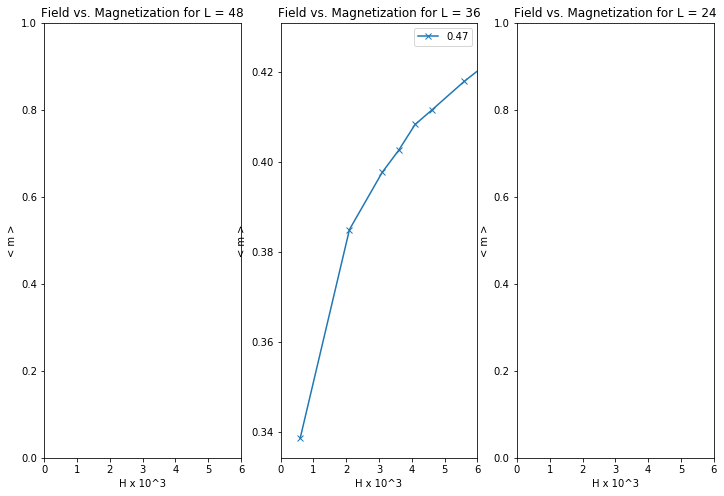

In [31]:
f,axi=plt.subplots(ncols=3,nrows=1,figsize=(12,8))
i=0
X_fit=[]
Y_fit=[]
Y_fit_err=[]
J_fit=[]
L_fit=[]
leng=[48,36,24]
k=-1
for l0 in leng:
    k+=1
    for L in analyzed_vals.keys():
        if L!=l0:
            continue
        for J in analyzed_vals[L].keys():
            if J==0.4:
                continue
            X=[]
            Y=[]
            Y_err=[]
            for H0 in analyzed_vals[L][J].keys():
                X.append((H0))
                Y.append(analyzed_vals[L][J][H0]['M0'])
                Y_err.append(analyzed_vals[L][J][H0]['M0_err'])
            for i in X:
                J_fit.append(J)
                L_fit.append(L)
                X_fit.append(sqrt(i))
            for i in Y:
                Y_fit.append(i)        
            for i in Y_err:
                Y_fit_err.append(i)
            i+=1
            N=argsort(X)
            X2=[X[i]*1000 for i in N]
            Y2=[Y[i] for i in N]
            Y2_err=[Y_err[i] for i in N]
            axi[k].plot(X2,Y2,marker='x',label=str(J)) 
    #         axi[k].xlim([0,0.16]) 
    plt.rcParams.update({'font.size': 10})
    axi[k].set_title("Field vs. Magnetization for L = "+str(l0))
    # axi[k].rcParams.update({'font.size': 20})
    axi[k].set_xlabel('H x 10^3')
    axi[k].set_ylabel('< m >')
    axi[k].set_xlim([0,6])
    plt.rcParams.update({'font.size': 10})
    axi[k].legend(loc=0)
# plt.savefig("../extracted_data/final_presentation/FvsM_TOT.png")
# plt.savefig("../extracted_data/o2analysis/FvsM_TOT.png")

val =  [-8.19677057  2.14633199  0.30362468]
chi-square :  2.6635190923104093e-07
chi-square with errorbars :  32.824997018789276
M0 =  0.3036246797823862  +/-  0.014351263885195049


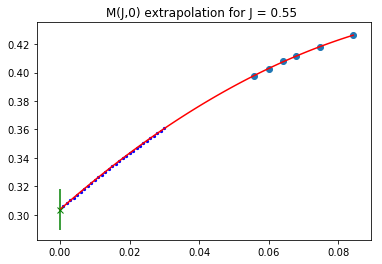

In [34]:
tik=True
J0=0.47
while tik :
    tik=False
    Xt,Yt,Yt_err=[],[],[]
    for i,j,k,J,L in zip(X_fit,Y_fit,Y_fit_err,J_fit,L_fit):
        if J!=J0:
            continue
#         if L!=48:
#             continue
        if i < 0.05:
            continue
        Xt.append(i)
        Yt.append(j)
        Yt_err.append(k)
    val,err=curve_fit(quadratic_fn,Xt,Yt)
    print("val = ",val)
    x=linspace(0,max(Xt),100)
    y=[quadratic_fn(i,val[0],val[1],val[2]) for i in x]
    
    file=open('../extracted_data/o2analysis/extrapolated_M_H','a')
    file.write("#dim,L,N,T,J,H0,E,E_err,M,M_err,SP_heat,SP_heat_err,SUCEP,SUCEP_err,M0,M0_err,M0_Bc,M1_Bc_err\n")
    for i in range(30):
        h=(0.001+0.001*i)**2
        file.write("3,48,0,1,"+str(J0)+","+str(h)+",0,0,0,1,0,0,0,0,"+str(quadratic_fn(sqrt(h),val[0],val[1],val[2]))+",1,0,0")
        file.write("\n")
        plt.scatter(sqrt(h),quadratic_fn(sqrt(h),val[0],val[1],val[2]),c='b',s=5)
    file.close()
    
    delY=[((j-quadratic_fn(i,val[0],val[1],val[2]))/1)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square : ", sum(delY)/(len(delY)-2))   
    
    delY=[((j-quadratic_fn(i,val[0],val[1],val[2]))/k)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square with errorbars : ", sum(delY)/(len(delY)-2))

    print('M0 = ',quadratic_fn(0,val[0],val[1],val[2])," +/- ",sqrt(err[-1][-1]))
    plt.plot(x,y,c='r')
    plt.scatter(Xt,Yt)
    plt.errorbar([0],[val[-1]],[sqrt(err[-1][-1])],fmt='o',c='g',marker='x')
#     plt.xlim([-0.002,max(Xt)+0.001])
#     plt.ylim([0.45,0.75])
    plt.title('M(J,0) extrapolation for J = 0.55 ')
f=open("../extracted_data/o2analysis/jAndM",'a')
f.write(str(J0)+","+str(quadratic_fn(0,val[0],val[1],val[2]))+","+str(sqrt(err[-1][-1]))+"\n")
f.close()

In [7]:
analyzed_vals=read_analyzed_data('../extracted_data/o2analysis/36_0.470_2_MCSF_A')

['']
31  DATA LINES READ


['']
16  DATA LINES READ
['']
16  DATA LINES READ
['']
31  DATA LINES READ
['']
31  DATA LINES READ


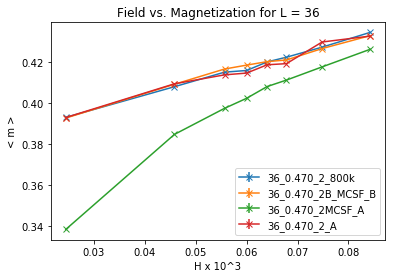

In [24]:
analyzed_vals=read_analyzed_data('../extracted_data/o2analysis/36_0.470_2_800k')
lab='36_0.470_2_800k'
# f,axi=plt.subplots(ncols=3,nrows=1,figsize=(12,8))
for J in analyzed_vals[L].keys():
    X=[]
    Y=[]
    Y_err=[]
    for H0 in analyzed_vals[L][J].keys():
        X.append(sqrt(H0))
        Y.append(analyzed_vals[L][J][H0]['M0'])
        Y_err.append(analyzed_vals[L][J][H0]['M0_err'])
    N=argsort(X)
    X2=[X[i]*1 for i in N]
    Y2=[Y[i] for i in N]
    Y2_err=[Y_err[i] for i in N]
    plt.errorbar(X2,Y2,Y2_err,marker='x',label=lab) 
    
#         plt.xlim([0,0.16]) 

analyzed_vals=read_analyzed_data('../extracted_data/o2analysis/36_0.470_2_B')
lab='36_0.470_2B_MCSF_B'
# f,axi=plt.subplots(ncols=3,nrows=1,figsize=(12,8))
for J in analyzed_vals[L].keys():
    X=[]
    Y=[]
    Y_err=[]
    for H0 in analyzed_vals[L][J].keys():
        X.append(sqrt(H0))
        Y.append(analyzed_vals[L][J][H0]['M0'])
        Y_err.append(analyzed_vals[L][J][H0]['M0_err'])
    N=argsort(X)
    X2=[X[i]*1 for i in N]
    Y2=[Y[i] for i in N]
    Y2_err=[Y_err[i] for i in N]
    plt.errorbar(X2,Y2,Y2_err,marker='x',label=lab) 
    
#         plt.xlim([0,0.16]) 

analyzed_vals=read_analyzed_data('../extracted_data/o2analysis/36_0.470_2_MCSF_A')
lab='36_0.470_2MCSF_A'
# f,axi=plt.subplots(ncols=3,nrows=1,figsize=(12,8))
for J in analyzed_vals[L].keys():
    X=[]
    Y=[]
    Y_err=[]
    for H0 in analyzed_vals[L][J].keys():
        X.append(sqrt(H0))
        Y.append(analyzed_vals[L][J][H0]['M0'])
        Y_err.append(analyzed_vals[L][J][H0]['M0_err'])
    N=argsort(X)
    X2=[X[i]*1 for i in N]
    Y2=[Y[i] for i in N]
    Y2_err=[Y_err[i] for i in N]
    plt.errorbar(X2,Y2,Y2_err,marker='x',label=lab) 
    
#         plt.xlim([0,0.16]) 


analyzed_vals=read_analyzed_data('../extracted_data/o2analysis/36_0.470_2_A')
lab='36_0.470_2_A'
x_fit=[]
y_fit=[]
# f,axi=plt.subplots(ncols=3,nrows=1,figsize=(12,8))
for J in analyzed_vals[L].keys():
    X=[]
    Y=[]
    Y_err=[]
    for H0 in analyzed_vals[L][J].keys():
        X.append(sqrt(H0))
        Y.append(analyzed_vals[L][J][H0]['M0'])
        Y_err.append(analyzed_vals[L][J][H0]['M0_err'])
    N=argsort(X)
    X2=[X[i]*1 for i in N]
    Y2=[Y[i] for i in N]
    Y2_err=[Y_err[i] for i in N]
    plt.errorbar(X2,Y2,Y2_err,marker='x',label=lab) 
    
#         plt.xlim([0,0.16]) 



plt.rcParams.update({'font.size': 10})
plt.title("Field vs. Magnetization for L = "+str(L))
# plt.rcParams.update({'font.size': 20})
plt.xlabel('H x 10^3')
plt.ylabel('< m >')
# plt.xlim([0,6])
plt.rcParams.update({'font.size': 10})
plt.legend(loc=0)


##### Fitting the leniar functions for various   J values

In [143]:
col_len_dict={24:'r',36:'g',48:'b'}

In [146]:
M0_list=[]
J_list=[]
C1_list=[]
C2_list=[]
X_all=[]
Y_all=[]
X_all_path=[]
Y_all_path=[]

In [36]:
tik=True
J0=0.60
while tik :
    tik=False
    Xt,Yt,Yt_err=[],[],[]
    for i,j,k,J,L in zip(X_fit,Y_fit,Y_fit_err,J_fit,L_fit):
        if J!=J0:
            continue
        if L!=48:
            continue
        Xt.append(i)
        Yt.append(j)
        Yt_err.append(k)
    val,err=curve_fit(leniar_fn,Xt,Yt)
    print("val = ",val)
    x=linspace(0,max(Xt),100)
    y=[leniar_fn(i,val[0],val[1]) for i in x]
    
    file=open('../extracted_data/o2analysis/extrapolated_M_H','a')
    file.write("#dim,L,N,T,J,H0,E,E_err,M,M_err,SP_heat,SP_heat_err,SUCEP,SUCEP_err,M0,M0_err,M0_Bc,M1_Bc_err\n")
    for i in range(30):
        h=(0.001+0.001*i)**2
        file.write("3,48,0,1,"+str(J0)+","+str(h)+",0,0,0,1,0,0,0,0,"+str(quadratic_fn(sqrt(h),val[0],val[1],val[2]))+",1,0,0")
        file.write("\n")
        plt.scatter(sqrt(h),leniar_fn(sqrt(h),val[0],val[1]),c='b',s=5)
    file.close()
    
    delY=[((j-leniar_fn(i,val[0],val[1]))/1)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square : ", sum(delY)/(len(delY)-2))   
    
    delY=[((j-leniar_fn(i,val[0],val[1]))/k)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square with errorbars : ", sum(delY)/(len(delY)-2))

    print('M0 = ',leniar_fn(0,val[0],val[1])," +/- ",sqrt(err[-1][-1]))
    plt.plot(x,y,c='r')
    plt.scatter(Xt,Yt)
    plt.errorbar([0],[val[-1]],[sqrt(err[-1][-1])],fmt='o',c='g',marker='x')
    plt.xlim([-0.002,max(Xt)+0.001])
    plt.ylim([0.45,0.75])
    plt.title('M(J,0) extrapolation for J = 0.55 ')
f=open("../extracted_data/o2analysis/jAndM",'a')
f.write(str(J0)+","+str(leniar_fn(0,val[0],val[1]))+","+str(sqrt(err[-1][-1]))+"\n")
f.close()

TypeError: Improper input: N=2 must not exceed M=0

#### J=0.60

val =  [ 0.50733104 -0.06345474  0.69142153]
chi-square :  1.1601609107517799e-06
chi-square with errorbars :  1511.9962379840915
M0 =  0.6914215319290741  +/-  0.0024467320918568174


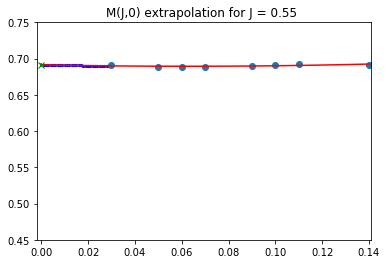

In [114]:
tik=True
J0=0.60
while tik :
    tik=False
    Xt,Yt,Yt_err=[],[],[]
    for i,j,k,J,L in zip(X_fit,Y_fit,Y_fit_err,J_fit,L_fit):
        if J!=J0:
            continue
        if L!=48:
            continue
        Xt.append(i)
        Yt.append(j)
        Yt_err.append(k)
    val,err=curve_fit(quadratic_fn,Xt,Yt)
    print("val = ",val)
    x=linspace(0,max(Xt),100)
    y=[quadratic_fn(i,val[0],val[1],val[2]) for i in x]
    
    file=open('../extracted_data/o2analysis/extrapolated_M_H','a')
    file.write("#dim,L,N,T,J,H0,E,E_err,M,M_err,SP_heat,SP_heat_err,SUCEP,SUCEP_err,M0,M0_err,M0_Bc,M1_Bc_err\n")
    for i in range(30):
        h=(0.001+0.001*i)**2
        file.write("3,48,0,1,"+str(J0)+","+str(h)+",0,0,0,1,0,0,0,0,"+str(quadratic_fn(sqrt(h),val[0],val[1],val[2]))+",1,0,0")
        file.write("\n")
        plt.scatter(sqrt(h),quadratic_fn(sqrt(h),val[0],val[1],val[2]),c='b',s=5)
    file.close()
    
    delY=[((j-quadratic_fn(i,val[0],val[1],val[2]))/1)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square : ", sum(delY)/(len(delY)-2))   
    
    delY=[((j-quadratic_fn(i,val[0],val[1],val[2]))/k)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square with errorbars : ", sum(delY)/(len(delY)-2))

    print('M0 = ',quadratic_fn(0,val[0],val[1],val[2])," +/- ",sqrt(err[-1][-1]))
    plt.plot(x,y,c='r')
    plt.scatter(Xt,Yt)
    plt.errorbar([0],[val[-1]],[sqrt(err[-1][-1])],fmt='o',c='g',marker='x')
    plt.xlim([-0.002,max(Xt)+0.001])
    plt.ylim([0.45,0.75])
    plt.title('M(J,0) extrapolation for J = 0.55 ')
f=open("../extracted_data/o2analysis/jAndM",'a')
f.write(str(J0)+","+str(quadratic_fn(0,val[0],val[1],val[2]))+","+str(sqrt(err[-1][-1]))+"\n")
f.close()

##### 0.550

In [68]:
max(X_fit)

0.0225

val =  [ 0.8845206  -0.0510223   0.63160778]
chi-square :  1.6320212069643686e-07
chi-square with errorbars :  253.00372325759963
M0 =  0.6316077756253795  +/-  0.0013845252462024024


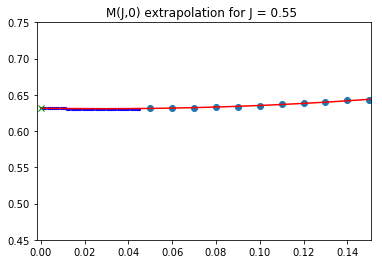

In [113]:
tik=True
J0=0.550
while tik :
    tik=False
    Xt,Yt,Yt_err=[],[],[]
    for i,j,k,J,L in zip(X_fit,Y_fit,Y_fit_err,J_fit,L_fit):
        if J!=J0:
            continue
        if L!=48:
            continue
        if i<0.045:
            continue
        Xt.append(i)
        Yt.append(j)
        Yt_err.append(k)
    val,err=curve_fit(quadratic_fn,Xt,Yt)
    print("val = ",val)
    x=linspace(0,max(Xt),100)
    y=[quadratic_fn(i,val[0],val[1],val[2]) for i in x]

    file=open('../extracted_data/o2analysis/extrapolated_M_H','a')
    file.write("#dim,L,N,T,J,H0,E,E_err,M,M_err,SP_heat,SP_heat_err,SUCEP,SUCEP_err,M0,M0_err,M0_Bc,M1_Bc_err\n")
    for i in range(45):
        h=(0.001+0.001*i)**2
        file.write("3,48,0,1,"+str(J0)+","+str(h)+",0,0,0,1,0,0,0,0,"+str(quadratic_fn(sqrt(h),val[0],val[1],val[2]))+",1,0,0")
        file.write("\n")
        plt.scatter(sqrt(h),quadratic_fn(sqrt(h),val[0],val[1],val[2]),c='b',s=5)
    file.close()
    
    delY=[((j-quadratic_fn(i,val[0],val[1],val[2]))/1)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square : ", sum(delY)/(len(delY)-2))
    delY=[((j-quadratic_fn(i,val[0],val[1],val[2]))/k)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square with errorbars : ", sum(delY)/(len(delY)-2))

    print('M0 = ',quadratic_fn(0,val[0],val[1],val[2])," +/- ",sqrt(err[-1][-1]))
    plt.plot(x,y,c='r')
    plt.scatter(Xt,Yt)
    plt.errorbar([0],[val[-1]],[sqrt(err[-1][-1])],fmt='o',c='g',marker='x')
    plt.xlim([-0.002,max(Xt)+0.001])
    plt.ylim([0.45,0.75])
    plt.title('M(J,0) extrapolation for J = 0.55 ')
f=open("../extracted_data/o2analysis/jAndM",'a')
f.write(str(J0)+","+str(quadratic_fn(0,val[0],val[1],val[2]))+","+str(sqrt(err[-1][-1]))+"\n")
f.close()

##### 0.470

val =  [1.67579357 0.49659861 0.37988073]
chi-square :  2.322174942872399e-06
chi-square with errorbars :  1065.170118910993
M0 =  0.3798807345032881  +/-  0.007335387931289274


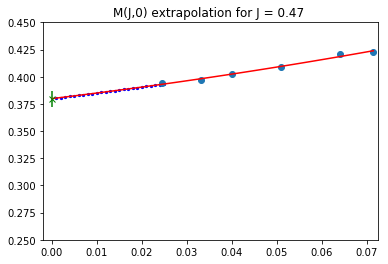

In [112]:
tik=True
J0=0.470
while tik :
    tik=False
    Xt,Yt,Yt_err=[],[],[]
    for i,j,k,J,L in zip(X_fit,Y_fit,Y_fit_err,J_fit,L_fit):
        if J!=J0:
            continue
        if L!=48:
            continue
        if i<0.015:
            continue
            
        Xt.append(i)
        Yt.append(j)
        Yt_err.append(k)
    val,err=curve_fit(quadratic_fn,Xt,Yt)
    print("val = ",val)
    x=linspace(0,max(Xt),100)
    y=[quadratic_fn(i,val[0],val[1],val[2]) for i in x]
    
    file=open('../extracted_data/o2analysis/extrapolated_M_H','a')
    file.write("#dim,L,N,T,J,H0,E,E_err,M,M_err,SP_heat,SP_heat_err,SUCEP,SUCEP_err,M0,M0_err,M0_Bc,M1_Bc_err\n")
    for i in range(25):
        h=(0.001+0.001*i)**2
        file.write("3,48,0,1,"+str(J0)+","+str(h)+",0,0,0,1,0,0,0,0,"+str(quadratic_fn(sqrt(h),val[0],val[1],val[2]))+",1,0,0")
        file.write("\n")
        plt.scatter(sqrt(h),quadratic_fn(sqrt(h),val[0],val[1],val[2]),c='b',s=5)
    file.close()
    
    delY=[((j-quadratic_fn(i,val[0],val[1],val[2]))/1)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square : ", sum(delY)/(len(delY)-2))
    delY=[((j-quadratic_fn(i,val[0],val[1],val[2]))/k)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square with errorbars : ", sum(delY)/(len(delY)-2))

    print('M0 = ',quadratic_fn(0,val[0],val[1],val[2])," +/- ",sqrt(err[-1][-1]))
    plt.plot(x,y,c='r')
    plt.scatter(Xt,Yt)
    plt.errorbar([0],[val[-1]],[sqrt(err[-1][-1])],fmt='o',c='g',marker='x')
    plt.xlim([-0.002,max(Xt)+0.001])
    plt.ylim([0.25,0.45])
    plt.title('M(J,0) extrapolation for J = 0.47 ')
f=open("../extracted_data/o2analysis/jAndM",'a')
f.write(str(J0)+","+str(quadratic_fn(0,val[0],val[1],val[2]))+","+str(sqrt(err[-1][-1]))+"\n")
f.close()

##### 0.465

val =  [-0.41930033  0.86832015  0.3351855 ]
chi-square :  1.5001848757256134e-05
chi-square with errorbars  :  3900.7323121035156
M0 =  0.3351855005729887  +/-  0.01657408390078222


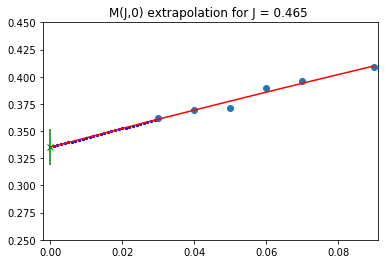

In [111]:
tik=True
J0=0.465
while tik :
    tik=False
    Xt,Yt,Yt_err=[],[],[]
    for i,j,k,J,L in zip(X_fit,Y_fit,Y_fit_err,J_fit,L_fit):
        if J!=J0:
            continue
        if L!=48:
            continue
        if i<0.025:
            continue
        Xt.append(i)
        Yt.append(j)
        Yt_err.append(k)
    val,err=curve_fit(quadratic_fn,Xt,Yt)
    print("val = ",val)
    x=linspace(0,max(Xt),100)
    y=[quadratic_fn(i,val[0],val[1],val[2]) for i in x]

    delY=[((j-quadratic_fn(i,val[0],val[1],val[2]))/1)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square : ", sum(delY)/(len(delY)-2))
    
    delY=[((j-quadratic_fn(i,val[0],val[1],val[2]))/k)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square with errorbars  : ", sum(delY)/(len(delY)-2))
    print('M0 = ',quadratic_fn(0,val[0],val[1],val[2])," +/- ",sqrt(err[-1][-1]))
    
    file=open('../extracted_data/o2analysis/extrapolated_M_H','a')
    file.write("#dim,L,N,T,J,H0,E,E_err,M,M_err,SP_heat,SP_heat_err,SUCEP,SUCEP_err,M0,M0_err,M0_Bc,M1_Bc_err\n")
    for i in range(30):
        h=(0.001+0.001*i)**2
        file.write("3,48,0,1,"+str(J0)+","+str(h)+",0,0,0,1,0,0,0,0,"+str(quadratic_fn(sqrt(h),val[0],val[1],val[2]))+",1,0,0")
        file.write("\n")
        plt.scatter(sqrt(h),quadratic_fn(sqrt(h),val[0],val[1],val[2]),c='b',s=5)
    file.close()
    plt.plot(x,y,c='r')
    plt.scatter(Xt,Yt)
    plt.errorbar([0],[val[-1]],[sqrt(err[-1][-1])],fmt='o',c='g',marker='x')
    plt.xlim([-0.002,max(Xt)+0.001])
    plt.ylim([0.25,0.45])
    plt.title('M(J,0) extrapolation for J = 0.465 ')
f=open("../extracted_data/o2analysis/jAndM",'a')
f.write(str(J0)+","+str(quadratic_fn(0,val[0],val[1],val[2]))+","+str(sqrt(err[-1][-1]))+"\n")
f.close()

##### 0.462

val =  [-1.68184098  1.3155882   0.29207252]
chi-square :  3.8033532681690802e-06
chi-square :  1663.7513122386513
M0 =  0.29207252199965317  +/-  0.006683768360865042


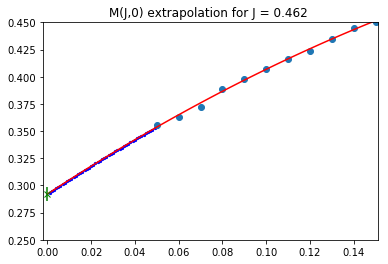

In [110]:
tik=True
J0=0.462
while tik :
    tik=False
    Xt,Yt,Yt_err=[],[],[]
    for i,j,k,J,L in zip(X_fit,Y_fit,Y_fit_err,J_fit,L_fit):
        if J!=J0:
            continue
        if L!=48:
            continue
        if i<0.045:
            continue
        Xt.append(i)
        Yt.append(j)
        Yt_err.append(k)
    val,err=curve_fit(quadratic_fn,Xt,Yt)
    print("val = ",val)
    x=linspace(0,max(Xt),100)
    y=[quadratic_fn(i,val[0],val[1],val[2]) for i in x]
    
    file=open('../extracted_data/o2analysis/extrapolated_M_H','a')
    file.write("#dim,L,N,T,J,H0,E,E_err,M,M_err,SP_heat,SP_heat_err,SUCEP,SUCEP_err,M0,M0_err,M0_Bc,M1_Bc_err\n")
    for i in range(50):
        h=(0.001+0.001*i)**2
        file.write("3,48,0,1,"+str(J0)+","+str(h)+",0,0,0,1,0,0,0,0,"+str(quadratic_fn(sqrt(h),val[0],val[1],val[2]))+",1,0,0")
        file.write("\n")
        plt.scatter(sqrt(h),quadratic_fn(sqrt(h),val[0],val[1],val[2]),c='b',s=5)
    file.close()
        
    delY=[((j-quadratic_fn(i,val[0],val[1],val[2]))/1)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square : ", sum(delY)/(len(delY)-2))
    delY=[((j-quadratic_fn(i,val[0],val[1],val[2]))/k)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square : ", sum(delY)/(len(delY)-2))

    print('M0 = ',quadratic_fn(0,val[0],val[1],val[2])," +/- ",sqrt(err[-1][-1]))
    plt.plot(x,y,c='r')
    plt.scatter(Xt,Yt)
    plt.errorbar([0],[val[-1]],[sqrt(err[-1][-1])],fmt='o',c='g',marker='x')
    plt.xlim([-0.002,max(Xt)+0.001])
    plt.ylim([0.25,0.45])
    plt.title('M(J,0) extrapolation for J = 0.462 ')
f=open("../extracted_data/o2analysis/jAndM",'a')
f.write(str(J0)+","+str(quadratic_fn(0,val[0],val[1],val[2]))+","+str(sqrt(err[-1][-1]))+"\n")
f.close()

##### 0.460 Leniar

val =  [1.0320746  0.28806029]
chi-square :  1.5989023939459084e-05
chi-square with error :  2560.067195617258
M0 =  0.2880602857065399  +/-  0.004854357840574692


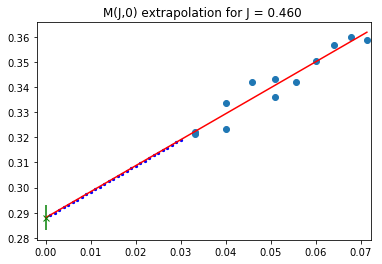

In [109]:
tik=True
J0=0.460
while tik :
    tik=False
    Xt,Yt,Yt_err=[],[],[]
    for i,j,k,J,L in zip(X_fit,Y_fit,Y_fit_err,J_fit,L_fit):
        if J!=J0:
            continue
        if i<0.033:
            continue
        Xt.append(i)
        Yt.append(j)
        Yt_err.append(k)
    val,err=curve_fit(leniar_fn,Xt,Yt)
    print("val = ",val)
    x=linspace(0,max(Xt),100)
    y=[leniar_fn(i,val[0],val[1]) for i in x]
    file=open('../extracted_data/o2analysis/extrapolated_M_H','a')
    file.write("#dim,L,N,T,J,H0,E,E_err,M,M_err,SP_heat,SP_heat_err,SUCEP,SUCEP_err,M0,M0_err,M0_Bc,M1_Bc_err\n")
    for i in range(30):
        h=(0.001+0.001*i)**2
        file.write("3,48,0,1,"+str(J0)+","+str(h)+",0,0,0,1,0,0,0,0,"+str(leniar_fn(sqrt(h),val[0],val[1]))+",1,0,0")
        file.write("\n")
        plt.scatter(sqrt(h),leniar_fn(sqrt(h),val[0],val[1]),c='b',s=5)
    file.close()
        
    delY=[((j-leniar_fn(i,val[0],val[1]))/1)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square : ", sum(delY)/(len(delY)-2))
    delY=[((j-leniar_fn(i,val[0],val[1]))/k)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square with error : ", sum(delY)/(len(delY)-2))

    print('M0 = ',leniar_fn(0,val[0],val[1])," +/- ",sqrt(err[-1][-1]))
    plt.plot(x,y,c='r')
    plt.scatter(Xt,Yt)
    plt.errorbar([0],[val[-1]],[sqrt(err[-1][-1])],fmt='o',c='g',marker='x')
    plt.xlim([-0.002,max(Xt)+0.001])
    plt.title('M(J,0) extrapolation for J = 0.460 ')
f=open("../extracted_data/o2analysis/jAndM",'a')
f.write(str(J0)+","+str(leniar_fn(0,val[0],val[1]))+","+str(sqrt(err[-1][-1]))+"\n")
f.close()

###### 0.460 Quadratic

val =  [-3.09994588  1.35157021  0.28031364]
chi-square :  1.5771713756152938e-05
chi-square with err :  2617.072384913932
M0 =  0.28031363588952596  +/-  0.0225780781913932


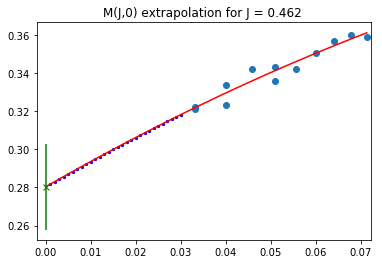

In [108]:
tik=True
while tik :
    tik=False
    Xt,Yt,Yt_err=[],[],[]
    for i,j,k,J,L in zip(X_fit,Y_fit,Y_fit_err,J_fit,L_fit):
        if J!=J0:
            continue
        if i<0.033:
            continue
        Xt.append(i)
        Yt.append(j)
        Yt_err.append(k)
    val,err=curve_fit(quadratic_fn,Xt,Yt)
    print("val = ",val)
    x=linspace(0,max(Xt),100)
    y=[quadratic_fn(i,val[0],val[1],val[2]) for i in x]
    file=open('../extracted_data/o2analysis/extrapolated_M_H','a')
    file.write("#dim,L,N,T,J,H0,E,E_err,M,M_err,SP_heat,SP_heat_err,SUCEP,SUCEP_err,M0,M0_err,M0_Bc,M1_Bc_err\n")
    for i in range(30):
        h=(0.001+0.001*i)**2
        file.write("3,48,0,1,"+str(J0)+","+str(h)+",0,0,0,1,0,0,0,0,"+str(quadratic_fn(sqrt(h),val[0],val[1],val[2]))+",1,0,0")
        file.write("\n")
        plt.scatter(sqrt(h),quadratic_fn(sqrt(h),val[0],val[1],val[2]),c='b',s=5)
    file.close()
    delY=[((j-quadratic_fn(i,val[0],val[1],val[2]))/1)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square : ", sum(delY)/(len(delY)-2))
    delY=[((j-quadratic_fn(i,val[0],val[1],val[2]))/k)**2 for i,j,k in zip(Xt,Yt,Yt_err) ]
    print("chi-square with err : ", sum(delY)/(len(delY)-2))

    print('M0 = ',quadratic_fn(0,val[0],val[1],val[2])," +/- ",sqrt(err[-1][-1]))
    plt.plot(x,y,c='r')
    plt.scatter(Xt,Yt)
    plt.errorbar([0],[val[-1]],[sqrt(err[-1][-1])],fmt='o',c='g',marker='x')
    plt.xlim([-0.002,max(Xt)+0.001])
    plt.title('M(J,0) extrapolation for J = 0.462 ')
f=open("../extracted_data/o2analysis/jAndM",'a')
f.write(str(J0)+","+str(quadratic_fn(0,val[0],val[1],val[2]))+","+str(sqrt(err[-1][-1]))+"\n")
f.close()

## M(T,0) near Tc

In [92]:
# f=open('../extracted_data/o2analysis/jAndM','r')
f=open('../extracted_data/o2analysis/jAndM','r')
l=f.readline()
J,M0,M0_err=[],[],[]
while l:
    it=l[:-1].split(',')
    j=float(it[0])
    if j==0.46:
        print("cont")
        l=f.readline()
        continue
    J.append(j)
    M0.append(float(it[1]))
    M0_err.append(float(it[2]))
    l=f.readline()

cont


In [93]:
w=0.79
v=0.6723
bet=0.3490
def fn_to_fit(dt,B,b1,b2):
    dt=abs(dt)
    return B*(dt)**bet * ( 1+b1* dt**(w*v) + b2*dt )

def fn_to_fit_2ndOrdChange(dt,B,b1,b2):
    dt=abs(dt)
    return B*(dt)**bet * ( 1+b1* dt**(w*v) + b2*dt**(2*w*v) )

def fn_to_fit_zeroth(dt,B):
    b1=0
    b2=0
    dt=abs(dt)
    return B*(dt)**bet * ( 1+b1* dt**(w*v) + b2*dt )

def fn_to_fit_b1(dt,B,b1):
    b2=0
    dt=abs(dt)
    return B*(dt)**bet * ( 1+b1* dt**(w*v) + b2*dt )

def fn_to_fit_b2(dt,B,b2):
    b1=0
    dt=abs(dt)
    return B*(dt)**bet * ( 1+b1* dt**(w*v) + b2*dt )

for b2,b2 = 0
val =  [0.88680636]
chi-square :  48.00850519708414
B =  0.8868063633203653 +/- 0.015576131377712079

for b2 = 0
val =  [ 0.96980105 -0.15472628]
chi-square :  2.0580135957662398
B =  0.9698010481200694 +/- 0.01232399447831219
b1 =  -0.15472628251538065 +/- 0.01974817015376341

for b1 = 0
val =  [ 0.94547648 -0.17008497]
chi-square :  0.8256569096180104
B =  0.9454764785918394 +/- 0.007638915027051309
b2 =  -0.17008496900314768 +/- 0.018434387968186725

for 2nd term with irrational power
val =  [ 0.94098732  0.01764123 -0.19425235]
chi-square :  1.4241883617907178
B =  0.940987320180894 +/- 0.03307169330320167
b2 =  0.017641233579899954 +/- 0.18999813788470854
b2 =  -0.19425234848809264 +/- 0.21257651207159312

for fn in paper
val =  [ 0.93847427  0.04449379 -0.21835636]
chi-square :  1.4592985592098158
B =  0.9384742695771162 +/- 0.03479617960618728
b1 =  0.04449378853668315 +/- 0.21472953087354926
b2 =  -0.21835635620879582 +/- 0.234004854687474


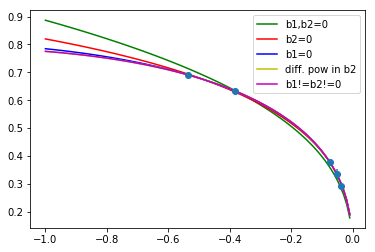

In [94]:
Tc=1/0.454165
dt=[1/i-Tc for i in J]
plt.errorbar(dt,M0,M0_err,fmt='o')

print("for b2,b2 = 0")
val,err=curve_fit(fn_to_fit_zeroth,dt,M0)
print("val = ",val)
delY=[((j-fn_to_fit_zeroth(i,val[0]))/k)**2 for i,j,k in zip(dt,M0,M0_err)]
print("chi-square : ", sum(delY)/(len(delY)-3))
print("B = ",val[0],"+/-",sqrt(err[0][0]) )
# print("b2 = ",val[2],"+/-",sqrt(err[2][2]) )
x=linspace(-1,-0.01,100)
y=[fn_to_fit_zeroth(i,val[0]) for i in x]
plt.plot(x,y,c='g',label='b1,b2=0')
print()


print("for b2 = 0")
val,err=curve_fit(fn_to_fit_b1,dt,M0)
print("val = ",val)
delY=[((j-fn_to_fit_b1(i,val[0],val[1]))/k)**2 for i,j,k in zip(dt,M0,M0_err)]
print("chi-square : ", sum(delY)/(len(delY)-3))
print("B = ",val[0],"+/-",sqrt(err[0][0]) )
print("b1 = ",val[1],"+/-",sqrt(err[1][1]) )
# print("b2 = ",val[2],"+/-",sqrt(err[2][2]) )
x=linspace(-1,-0.01,100)
y=[fn_to_fit_b1(i,val[0],val[1]) for i in x]
plt.plot(x,y,c='r',label='b2=0')
print()

print("for b1 = 0")
val,err=curve_fit(fn_to_fit_b2,dt,M0)
print("val = ",val)
delY=[((j-fn_to_fit_b2(i,val[0],val[1]))/k)**2 for i,j,k in zip(dt,M0,M0_err)]
print("chi-square : ", sum(delY)/(len(delY)-3))
print("B = ",val[0],"+/-",sqrt(err[0][0]) )
print("b2 = ",val[1],"+/-",sqrt(err[1][1]) )
# print("b2 = ",val[2],"+/-",sqrt(err[2][2]) )
x=linspace(-1,-0.01,100)
y=[fn_to_fit_b2(i,val[0],val[1]) for i in x]
plt.plot(x,y,c='b',label='b1=0')
plt.legend(loc=0)
print()

print("for 2nd term with irrational power")
val,err=curve_fit(fn_to_fit_2ndOrdChange,dt,M0)
print("val = ",val)
delY=[((j-fn_to_fit_2ndOrdChange(i,val[0],val[1],val[2]))/k)**2 for i,j,k in zip(dt,M0,M0_err)]
print("chi-square : ", sum(delY)/(len(delY)-3))
print("B = ",val[0],"+/-",sqrt(err[0][0]) )
print("b2 = ",val[1],"+/-",sqrt(err[1][1]) )
print("b2 = ",val[2],"+/-",sqrt(err[2][2]) )
x=linspace(-1,-0.01,100)
y=[fn_to_fit_2ndOrdChange(i,val[0],val[1],val[2]) for i in x]
plt.plot(x,y,c='y',label='diff. pow in b2')
plt.legend(loc=0)
print()

print("for fn in paper")
val,err=curve_fit(fn_to_fit,dt,M0)
print("val = ",val)
delY=[((j-fn_to_fit(i,val[0],val[1],val[2]))/k)**2 for i,j,k in zip(dt,M0,M0_err)]
print("chi-square : ", sum(delY)/(len(delY)-3))
print("B = ",val[0],"+/-",sqrt(err[0][0]) )
print("b1 = ",val[1],"+/-",sqrt(err[1][1]) )
print("b2 = ",val[2],"+/-",sqrt(err[2][2]) )
x=linspace(-1,-0.01,100)
y=[fn_to_fit(i,val[0],val[1],val[2]) for i in x]
plt.plot(x,y,c='m',label='b1!=b2!=0')
plt.legend(loc=0)

## Magnetization at Tc for diminishing H

In [51]:
def Mtc_fit_fn(H,dc,dc1):
    return dc*H**(1/delta) *(1+ dc1* H**(w*vc))

In [52]:
analyzed_vals=read_analyzed_data('../extracted_data/o2analysis/analysis_full')

[' ']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUC

In [53]:
analyzed_vals[48].keys()

dict_keys([0.4, 0.46, 0.462, 0.465, 0.47, 0.55, 0.6, 0.454165, 0.0])

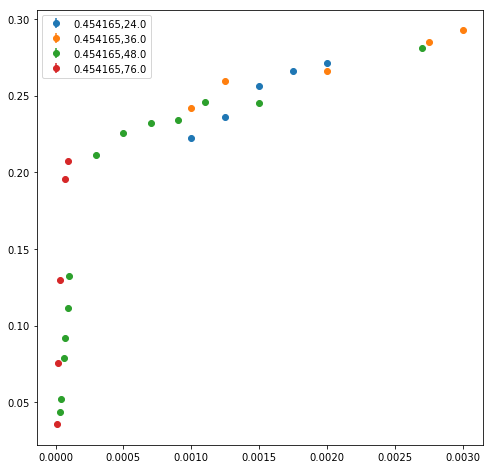

In [54]:
i=0
X_fit=[]
Y_fit=[]
Y_err_fit=[]
plt.figure(figsize=(8,8))
for L in analyzed_vals.keys():
#     if L!=48:
#         continue
    for J in analyzed_vals[L].keys():
        if abs(J-1/Tc) > 1e-8:
#             print(" continuing for J = ",J)
            continue
#         print("her")
        X=[]
        Y=[]
        Y_err=[]
        for H0 in analyzed_vals[L][J].keys():
#             if H0>0.002:
#                 continue
#             if H0<0.0004 and L!=76:
#                 continue
            X.append(H0)
            Y.append(analyzed_vals[L][J][H0]['M0'])
            Y_err.append(analyzed_vals[L][J][H0]['M0_err'])
        for i,j,k in zip(X,Y,Y_err):
            X_fit.append(i)
            Y_fit.append(j)
            Y_err_fit.append(k)
        plt.errorbar(X,Y,Y_err,fmt='o',label=str(J)+','+str(L)) 
#         plt.xlim([0,0.06]) 
plt.legend(loc=0)

val =  [0.85639499 1.08036775]
chi-square :  20.351605378116574
dc =  0.8563949900898981 +/- 0.10012771029945351
dc1 =  1.080367752105602 +/- 1.0901251563654042


(0, 0.292768)

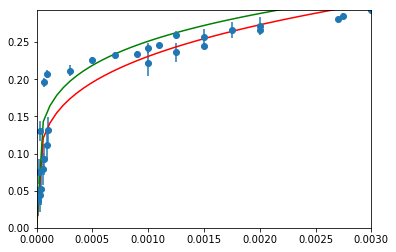

In [55]:
X_fit2=[]
Y_fit2=[]
Y_err_fit2=[]
for i,j,k in zip(X_fit,Y_fit,Y_err_fit):
#     if i<0.00005:
# #         continue
#     if i>0.02:
#         continue
    X_fit2.append(i)
    Y_fit2.append(j)
    Y_err_fit2.append(k*30)
plt.errorbar(X_fit2,Y_fit2,Y_err_fit2,fmt='o')
val,err=curve_fit(Mtc_fit_fn,X_fit2,Y_fit2)

print("val = ",val)
delY=[((j-Mtc_fit_fn(i,val[0],val[1]))/k)**2 for i,j,k in zip(X_fit2,Y_fit2,Y_err_fit2)]
print("chi-square : ", sum(delY)/(len(delY)-2))
print("dc = ",val[0],"+/-",sqrt(err[0][0]) )
print("dc1 = ",val[1],"+/-",sqrt(err[1][1]) )

x=linspace(0,0.3,5000)
y=[Mtc_fit_fn(i,val[0],val[1]) for i in x]
plt.plot(x,y,c='r',label='Main')
y=[i**(0.2) for i in x]
plt.plot(x,y,c='g',label='just B^1/del')
plt.xlim([0,max(X_fit2)])
plt.ylim([0,max(Y_fit2)])

## For T>Tc

In [44]:
analyzed_vals=read_analyzed_data('../extracted_data/GS_analysis/analysis_MT_greater')

60  DATA LINES READ


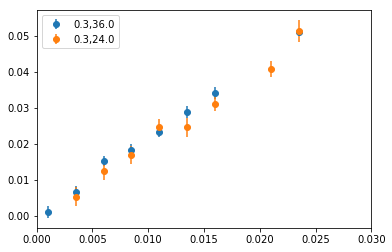

In [45]:
i=0
for L in analyzed_vals.keys():
    for J in analyzed_vals[L].keys():
        X=[]
        Y=[]
        Y_err=[]
        for H0 in analyzed_vals[L][J].keys():
            X.append((H0))
            Y.append(analyzed_vals[L][J][H0]['M0'])
            Y_err.append(analyzed_vals[L][J][H0]['M0_err']*30)
        plt.errorbar(X,Y,Y_err,fmt='o',label=str(J)+','+str(L)) 
        plt.xlim([0,0.03]) 
plt.legend(loc=0)

## Ploting Basic Version of scaling function

In [56]:
f=read_generic_data('../extracted_data/o2analysis/analysis_full')
analyzed_vals=read_analyzed_data('../extracted_data/o2analysis/analysis_full')

608  DATA LINES READ
[' ']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat'

### For Individual lattice sizes

In [63]:
T0=1.18
H0_amp=1.11
H0_finite_size={48:0.0005,36:0.001,24:0.002}

cdict_temp={ 0.4:'b', 0.454165:'w', 0.462:'r', 0.460:'y', 0.465:'c',0.47:'m', 0.55:'g', 0.6:'k'}


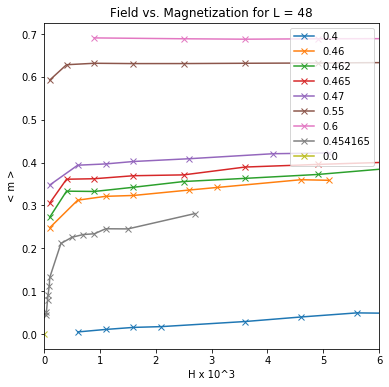

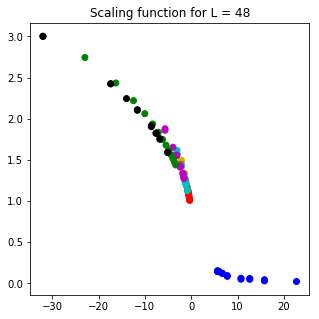

In [65]:
L0=48
while True:
    plt.figure(figsize=(6,6))
    i=0
    X_fit=[]
    Y_fit=[]
    Y_fit_err=[]
    J_fit=[]
    L_fit=[]
    for L in [L0]:
        for J in analyzed_vals[L].keys():
    #         if J==0.4:
    #             continue
            X=[]
            Y=[]
            Y_err=[]
            for H0 in analyzed_vals[L][J].keys():
                X.append((H0))
                Y.append(analyzed_vals[L][J][H0]['M0'])
                Y_err.append(analyzed_vals[L][J][H0]['M0_err'])
            for i in X:
                J_fit.append(J)
                L_fit.append(L)
                X_fit.append(sqrt(i))
            for i in Y:
                Y_fit.append(i)        
            for i in Y_err:
                Y_fit_err.append(i)
            i+=1
            N=argsort(X)
            X2=[X[i]*1000 for i in N]
            Y2=[Y[i] for i in N]
            Y2_err=[Y_err[i] for i in N]
            plt.plot(X2,Y2,marker='x',label=str(J)) 
    #         plt.xlim([0,0.16]) 
    plt.rcParams.update({'font.size': 10})
    plt.title("Field vs. Magnetization for L = "+str(L))
    # plt.rcParams.update({'font.size': 20})
    plt.xlabel('H x 10^3')
    plt.ylabel('< m >')
    plt.xlim([0,6])
    plt.rcParams.update({'font.size': 10})
    plt.legend(loc=1)
    plt.savefig("../extracted_data/final_presentation/FvsM_48png")
    plt.savefig("../extracted_data/o2analysis/FvsM_48.png")
    X=[]
    Y=[]
    Y_err=[]
    col=[]
    cdict={48:'b',24:'g',36:'r'}
    plt.figure(figsize=(5,5))
    cdict_temp={ 0.4:'b', 0.454165:'w', 0.462:'r', 0.460:'y', 0.465:'c',0.47:'m', 0.55:'g', 0.6:'k'}
    for i in range(len(f['T'])):
        if f['L'][i]!=L0 :
            continue  
        if f['H0'][i]<H0_finite_size[L]:
            continue
        h=f['H0'][i]/(H0_amp)
        t=(1/f['J'][i] - Tc)/T0
        if abs(t)<1e-8:
            continue
        temp=t/h**(1/(beta*delta))
        temp1=f['M0'][i]/(h**(1/delta))
        X.append(temp)
        Y.append(temp1)
        Y_err.append(f['M0_err'][i]/(1/h**(1/delta)))
    #     col.append(cdict[f['L'][i]])
        col.append(cdict_temp[f['J'][i]])
    print("cdict_temp={ 0.4:'b', 0.454165:'w', 0.462:'r', 0.460:'y', 0.465:'c',0.47:'m', 0.55:'g', 0.6:'k'}")
    plt.scatter(X,Y,c=col)
    plt.title("Scaling function for L = "+str(L))
    # plt.xlim([-7.5,2.5])
    # plt.ylim([1,2])
    break

        finite size effects starts to be non negligible for H < 0.001 they needs to be removed from the analysis to extract the scaling funtion.

cdict_temp={ 0.4:'b', 0.454165:'w', 0.462:'r', 0.460:'y', 0.465:'c',0.47:'m', 0.55:'g', 0.6:'k'}
cdict={48:'b',24:'g',36:'r'


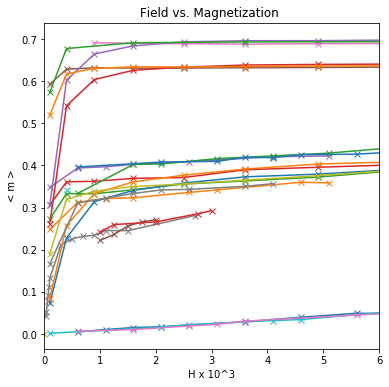

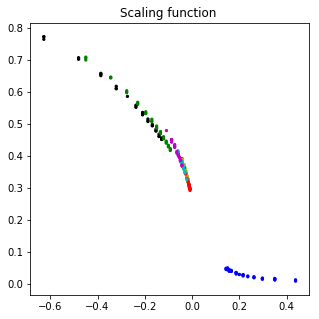

In [69]:
while True:
    plt.figure(figsize=(6,6))
    i=0
    X_fit=[]
    Y_fit=[]
    Y_fit_err=[]
    J_fit=[]
    L_fit=[]
    for L in [48,24,36]:
        for J in analyzed_vals[L].keys():
    #         if J==0.4:
    #             continue
            X=[]
            Y=[]
            Y_err=[]
            for H0 in analyzed_vals[L][J].keys():
                X.append((H0))
                Y.append(analyzed_vals[L][J][H0]['M0'])
                Y_err.append(analyzed_vals[L][J][H0]['M0_err'])
            for i in X:
                J_fit.append(J)
                L_fit.append(L)
                X_fit.append(sqrt(i))
            for i in Y:
                Y_fit.append(i)        
            for i in Y_err:
                Y_fit_err.append(i)
            i+=1
            N=argsort(X)
            X2=[X[i]*1000 for i in N]
            Y2=[Y[i] for i in N]
            Y2_err=[Y_err[i] for i in N]
            plt.plot(X2,Y2,marker='x',label=str(J)) 
    #         plt.xlim([0,0.16]) 
    plt.rcParams.update({'font.size': 10})
    plt.title("Field vs. Magnetization ")
    # plt.rcParams.update({'font.size': 20})
    plt.xlabel('H x 10^3')
    plt.ylabel('< m >')
    plt.xlim([0,6])
    plt.rcParams.update({'font.size': 10})
#     plt.legend(loc=1)
    plt.savefig("../extracted_data/final_presentation/FvsM_TOT.")
    plt.savefig("../extracted_data/o2analysis/FvsM_TOT.png")
    X=[]
    Y=[]
    Y_err=[]
    col=[]
    cdict={48:'b',24:'g',36:'r'}
    plt.figure(figsize=(5,5))
    cdict_temp={ 0.4:'b', 0.454165:'w', 0.462:'r', 0.460:'y', 0.465:'c',0.47:'m', 0.55:'g', 0.6:'k'}
    for i in range(len(f['T'])):
#         if f['L'][i]==48 :
#             continue  
        if f['H0'][i]<H0_finite_size[L]:
            continue
        h=f['H0'][i]/(H0)
        t=(1/f['J'][i] - Tc)/T0
        if abs(t)<1e-6:
            continue
        temp=t/h**(1/(beta*delta))
        temp1=f['M0'][i]/(h**(1/delta))
        X.append(temp)
        Y.append(temp1)
        Y_err.append(f['M0_err'][i]/(1/h**(1/delta)))
#         col.append(cdict[f['L'][i]])
        col.append(cdict_temp[f['J'][i]])
    print("cdict_temp={ 0.4:'b', 0.454165:'w', 0.462:'r', 0.460:'y', 0.465:'c',0.47:'m', 0.55:'g', 0.6:'k'}")
    print("cdict={48:'b',24:'g',36:'r'")
    plt.scatter(X,Y,c=col,s=5)
    plt.title("Scaling function ")
#     plt.xlim([-1.5,0.5])
    # plt.ylim([1,2])
    break

## Extration of Scaling Funtion

In [116]:
analyzed_vals=read_analyzed_data('../extracted_data/GS_analysis/analysis_scaling')
M,M_err,H,J=[],[],[],[]
for L in analyzed_vals.keys():
    for _J in analyzed_vals[L].keys():
        for H0 in analyzed_vals[L][_J].keys():
            M.append(analyzed_vals[L][_J][H0]['M0'])
            M_err.append(analyzed_vals[L][_J][H0]['M0_err'])
            J.append(_J)
            H.append(H0)
T=[1/i for i in J]
f=open('../extracted_data/GS_analysis/fit_raw_data','w')
f.write('#T,H,M,M_err\n')
for a,b,c,d in zip(T,H,M,M_err):
    f.write(str(a)+","+str(b)+","+str(c)+","+str(d)+'\n')
f.close()

T0=1.18
H0=1.11
Tc=1/0.454165
w=0.79
nu=0.6723
beta=0.34490
delta=3*nu/beta - 1
h1=[i/H0 for i in H]
t1=[(i-Tc)/T0 for i in T]
X1=[i*j**(-1/(beta*delta)) for i,j in zip(t1,h1)]
arg=argsort(X1)
X,t,h=[],[],[]
for i in arg:
    X.append(X1[i])
    t.append(t1[i])
    h.append(h1[i])
lis=[]
for i in range(len(X)-1):
    if X[i]==X[i+1]:
        if t[i]==t[i+1]:
            if h[i]==h[i+1]:
                lis.append(i+1)
                print(i,end=",")
lis.sort(reverse=True)
for i in lis:
    X.pop(i)
    h.pop(i)
    t.pop(i)
f=open('../extracted_data/GS_analysis/val.txt','w')
for i in range(len(X)):
    f.write(str(X[i])+','+str(t[i])+','+str(h[i])+'\n')
f.close()

441  DATA LINES READ
0,2,3,5,7,9,10,12,14,15,17,19,21,23,24,26,27,29,30,32,33,35,37,39,41,42,45,47,49,50,52,53,55,56,58,59,61,62,64,66,68,69,71,72,74,76,78,79,81,83,85,86,88,89,91,93,94,96,98,99,101,102,104,106,107,109,110,112,113,115,117,118,120,122,124,125,127,129,130,132,134,135,137,139,141,142,144,146,148,149,151,153,154,156,157,159,160,162,164,165,167,168,170,171,173,175,176,178,179,182,183,185,186,188,189,191,193,194,196,197,199,200,203,204,206,207,210,211,213,214,216,217,221,222,224,225,228,229,231,232,235,236,238,239,241,242,244,245,247,248,250,251,253,254,256,257,259,260,262,263,283,285,287,289,291,293,295,297,299,301,303,305,308,310,312,314,316,318,320,322,324,327,

In [2]:
T0=1.18
H0=1.11
Tc=1/0.454165
w=0.79
nu=0.6723
beta=0.34490
delta=3*nu/beta - 1

## Binders Analysis

In [9]:
analyzed_vals=read_analyzed_data('../extracted_data/o2analysis/analysis_full')

[' ']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err']
[' #dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUC

In [10]:
analyzed_vals[24][0.462][0.0001].keys()

dict_keys(['dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err'])

In [19]:
i=0
binder_data=dict()
for L in analyzed_vals.keys():
    if L not in binder_data.keys():
        binder_data.update({L:dict()})
    for J in analyzed_vals[L].keys():
        for H0 in analyzed_vals[L][J].keys():
            if H0 not in binder_data[L].keys():
                binder_data[L].update({H0:{'J':[],'bc':[],'bc_err':[]}})
#             print('adding ',J,' to ',H0,L)
            binder_data[L][H0]['J'].append(J)
            binder_data[L][H0]['bc'].append(analyzed_vals[L][J][H0]['M0_Bc'])
#             print(binder_data[L][H0]['bc'][-1])
            binder_data[L][H0]['bc_err'].append(analyzed_vals[L][J][H0]['M1_Bc_err'])
        i+=1


In [20]:
H0_list=list(binder_data[24].keys())

/home/aravind/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


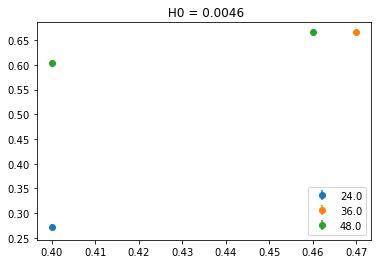

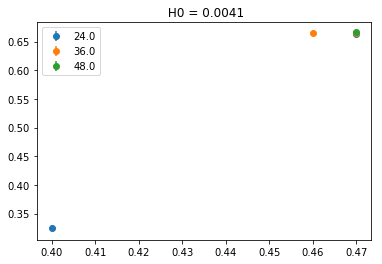

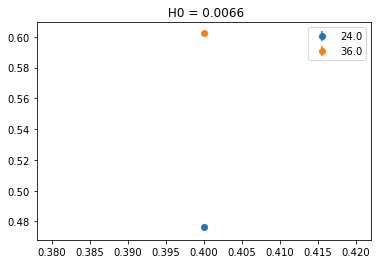

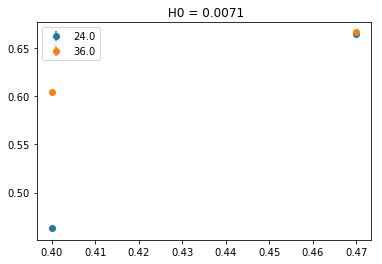

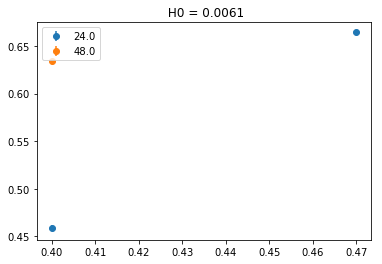

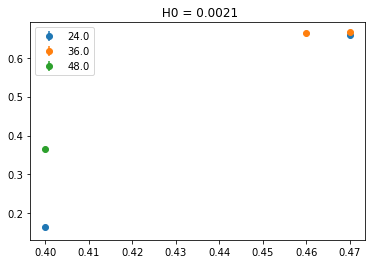

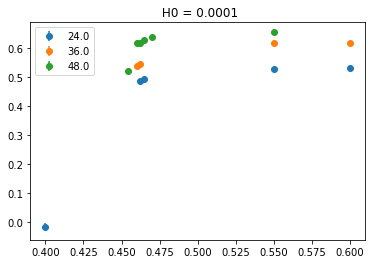

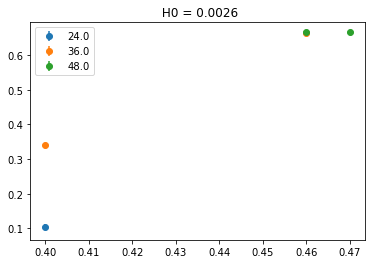

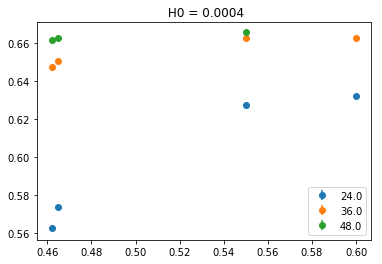

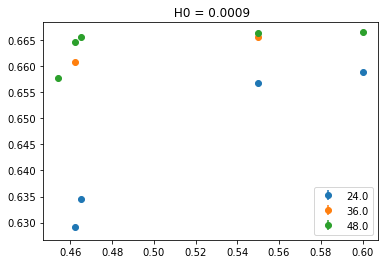

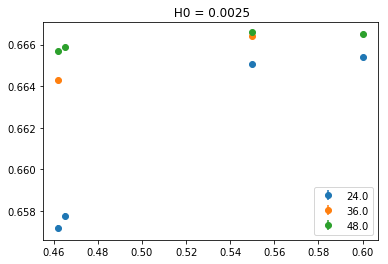

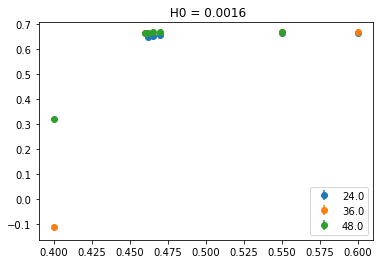

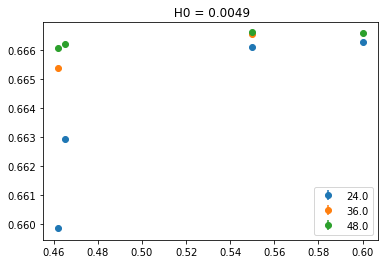

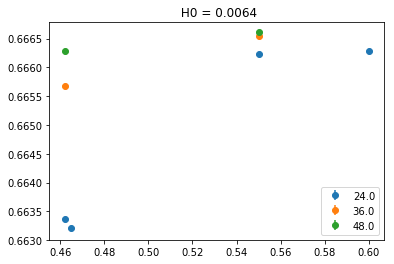

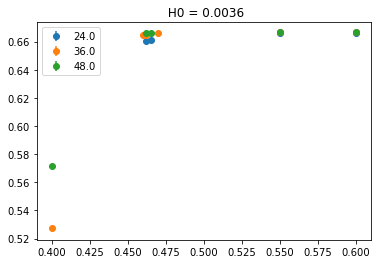

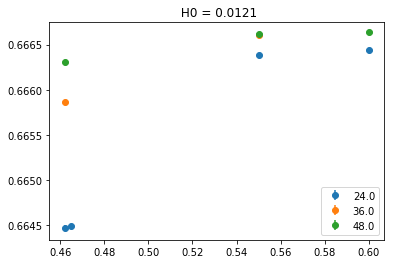

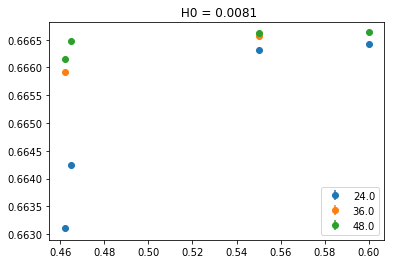

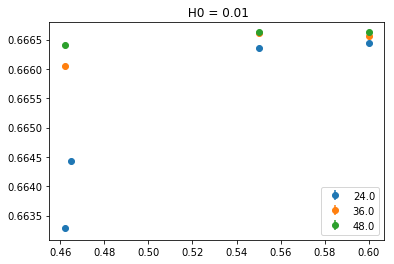

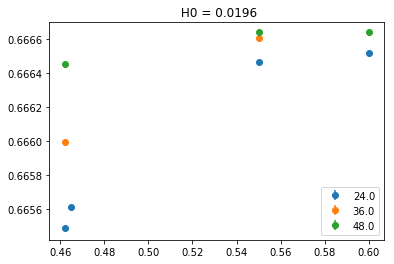

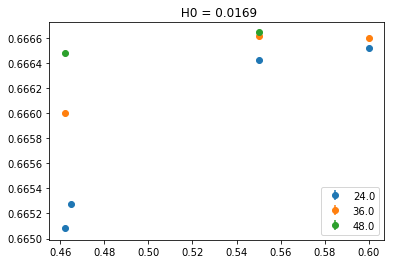

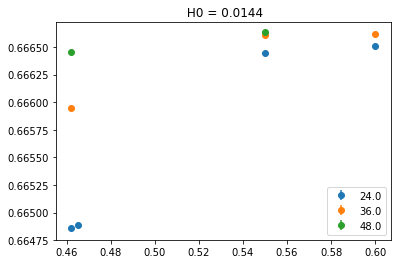

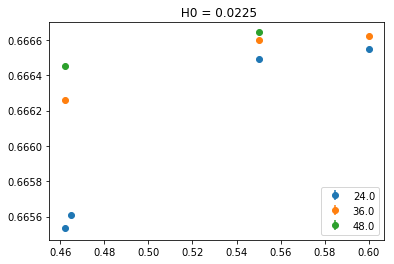

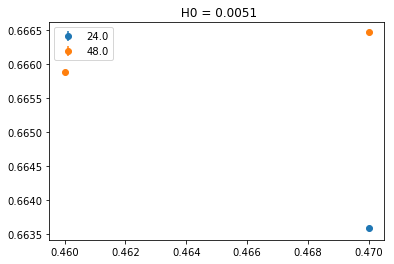

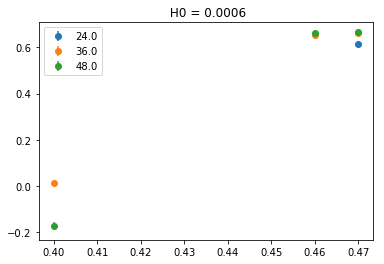

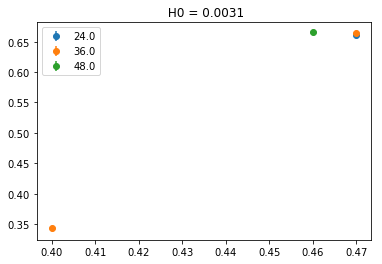

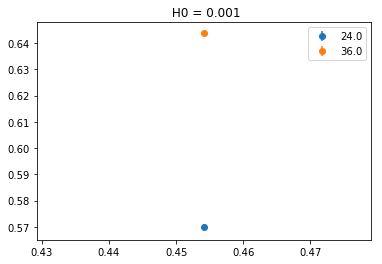

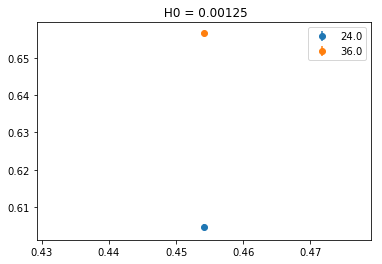

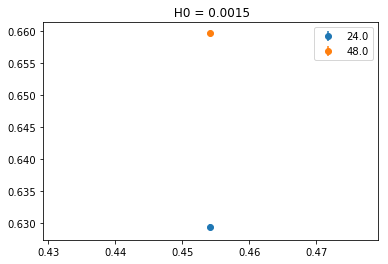

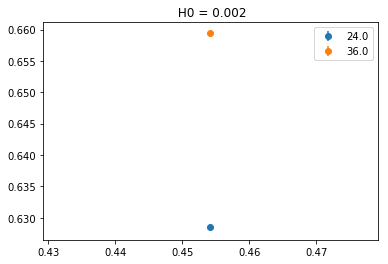

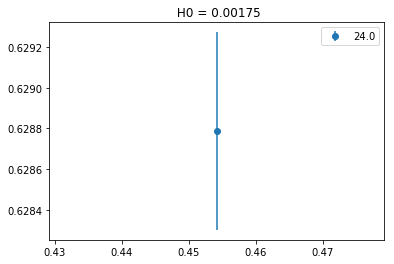

In [24]:
for H0 in H0_list:
    plt.figure()
    for L in binder_data.keys():
        if H0 in binder_data[L].keys():
            Y=[i for i in binder_data[L][H0]['bc']]
            Y_err=[i for i in binder_data[L][H0]['bc_err']]
            X=[i for i in binder_data[L][H0]['J']]
            N=argsort(X)
            X2=[X[i] for i in N]
            Y2=[Y[i] for i in N]
            Y2_err=[Y_err[i] for i in N]
            plt.errorbar(X2,Y2,Y2_err,label =str(L),fmt='o')
    plt.legend(loc=0)
    plt.title(' H0 = '+str(H0))

In [26]:
# plt.figure(figsize=(10,10))
i=0
X_fit=[]
Y_fit=[]
# f,ax=plt.subplots(ncols=3,nrows=1)
# axis={24:ax[0],36:ax[1],48:ax[2]}

for J in analyzed_vals[24].keys():
    plt.figure()
    X=[]
    Y=[]
    Y_err=[]
    col=[]
    k=0
    for L in [24,36,48]:
        k+=1
        if J not in analyzed_vals[L].keys():
            continue
        for H0 in analyzed_vals[L][J].keys():
            X.append(sqrt(H0))
            Y.append(analyzed_vals[L][J][H0]['M0_Bc'])
            Y_err.append(analyzed_vals[L][J][H0]['M0_Bc_err'])
            col.append(k)
            
    i+=1
    plt.title(str(J))
    plt.scatter(X,Y,c=col) 
    plt.xlim([0,0.16]) 
#     plt.legend(loc=0)

KeyError: 'M0_Bc_err'

## Phase and time history analysis @ Meeting

In [26]:
dat=get_data_xyModel(fnames[0])

In [28]:
tag_name='N16_RG_sbf_MIX'
BASE_FOLDER='../simulation_data/raw/'+tag_name+'/'
f=open(BASE_FOLDER+"fnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    fnames.append(BASE_FOLDER+l[:-1])
    l=f.readline()
f.close()
print("Files to be analyzed : " ,len(fnames))

Files to be analyzed :  8


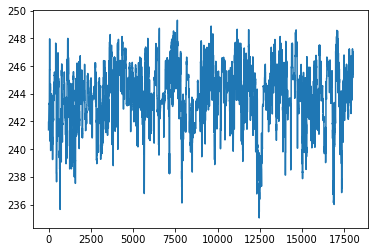

In [31]:
datMCS=get_data_xyModel(fnames[1])
n0=0
n=-1
plt.plot(datMCS['time'][n0:n],datMCS['magentization'][n0:n])

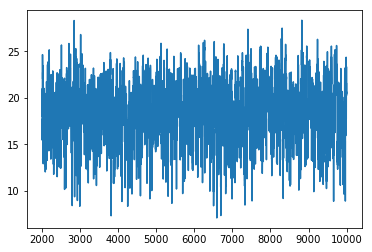

In [79]:
datW=get_data_xyModel(fnames[0])
n0=2000
n=10000
plt.plot(datW['time'][n0:n],datW['energy'][n0:n])

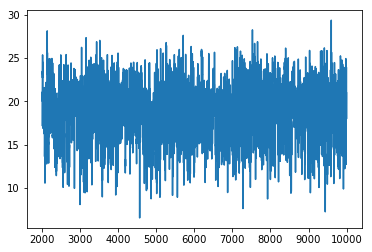

In [83]:
datMIX=get_data_xyModel(fnames[0])
n0=2000
n=10000
plt.plot(datMIX['time'][n0:n],datMIX['energy'][n0:n])

In [67]:
ang=[i*2*pi/400-pi for i in range(400)]
c4=[cos(4*i) for i in ang]
c8=[cos(8*i) for i in ang]

In [68]:
a=0.06
b=0.15

(-0.7853981633974483, 0.7853981633974483)

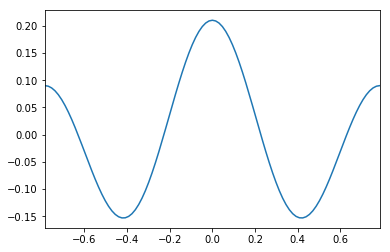

In [69]:
x=ang
y=[a*i+b*j for i,j in zip(c4,c8)]
plt.plot(x,y)
plt.xlim([-pi/4,pi/4])

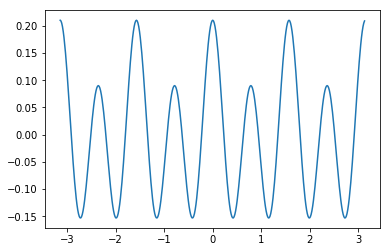

In [70]:
plt.plot(x,y)

In [105]:
tag_name='N08_xy'
BASE_FOLDER='../simulation_data/raw/'+tag_name+'/'
f=open(BASE_FOLDER+"fnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    fnames.append(BASE_FOLDER+l[:-1])
    l=f.readline()
f.close()
print("Files to be analyzed : " ,len(fnames))

Files to be analyzed :  15


In [106]:
 dat=get_data_xyModel(fnames[0]);

In [84]:
fnames

['../simulation_data/raw/N08_xy/L_8_T_0.250_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.370_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.490_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.610_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.730_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.850_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_0.970_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.090_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.210_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.330_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.450_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.570_J_1.000_h4_0.000_h8_0.000_xy.txt',
 '../simulation_data/raw/N08_xy/L_8_T_1.690_J_1.000_

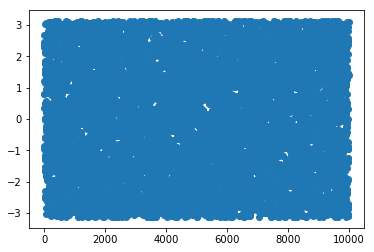

In [107]:
n0=0
n=10000
phase_hist=[arctan2(j,i) for i,j in zip(dat['magentization_x'][n0:n],dat['magentization_y'][n0:n])]
plt.scatter(dat['time'][n0:n],phase_hist)

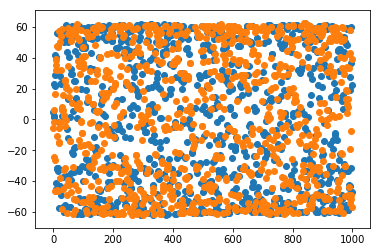

In [85]:
n0=0
n=1000
plt.scatter(dat['time'][n0:n],dat['magentization_y'][n0:n])
# plt.figure()
plt.scatter(dat['time'][n0:n],dat['magentization_x'][n0:n])

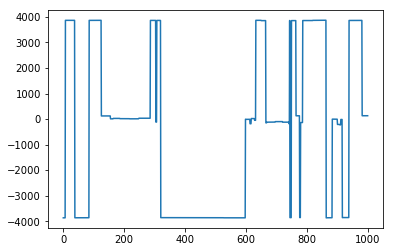

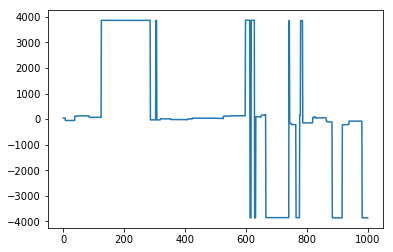

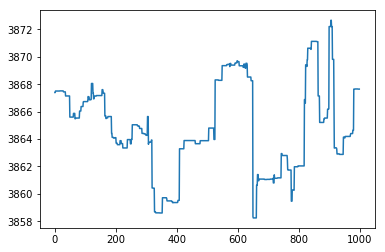

In [91]:
n0=0
n=1000
plt.plot(dat['time'][n0:n],dat['magentization_y'][n0:n])
plt.figure()
plt.plot(dat['time'][n0:n],dat['magentization_x'][n0:n])
plt.figure()
plt.plot(dat['time'][n0:n],dat['magentization'][n0:n])
